# **GRUPO 9: MODELO DE REGRESIÓN LINEAL**

En esta sección se desarrollará la implementación de un modelo de regresión utilizando la base de datos Income, con el objetivo de realizar una evaluación preliminar de la calidad de los datos. Asimismo, se llevará a cabo un proceso de preprocesamiento adecuado en caso de ser necesario y se concluirá con un análisis exploratorio visual, tanto univariado como bivariado.

## **1. Importación de las librerias base:**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Conexión con google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import os
path_proyecto = "/content/drive/MyDrive/2026-0/Machine learning"
os.chdir(path_proyecto)

In [5]:
import pandas as pd
df = pd.read_excel('Proyecto 1/income_dataset.xlsx')

Una vez incorporada la base de datos, se procede a su visualización y a la realización de un análisis exploratorio preliminar de la base de datos.

In [6]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [7]:
#Verificación de nulos
df.isnull().sum(axis=0)

,0
Age,0
Education_Level,0
Occupation,0
Number_of_Dependents,0
Location,0
Work_Experience,0
Marital_Status,0
Employment_Status,0
Household_Size,0
Homeownership_Status,0


In [8]:
#Separación de variables numéricas y categóricas
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()


## **2. Análisis estadístico inicial (descriptivo)**

**Resultados de la descripción numérica:**


In [25]:
# 1) Numéricas - descriptiva
print(df[num_cols].describe().T)
print(df[num_cols].quantile([0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]).T)
print(df[num_cols].isna().mean().to_frame('% Missing'))
for col in num_cols:
    print(df[col].value_counts().head(5))

                        count         mean           std      min      25%  \
Age                   10000.0      44.0217  1.520400e+01     18.0     31.0   
Number_of_Dependents  10000.0       2.5270  1.713991e+00      0.0      1.0   
Work_Experience       10000.0      24.8588  1.465262e+01      0.0     12.0   
Household_Size        10000.0       3.9896  2.010496e+00      1.0      2.0   
Income                10000.0  816838.1667  1.821089e+06  31044.0  68446.0   

                          50%       75%        max  
Age                      44.0      57.0       70.0  
Number_of_Dependents      3.0       4.0        5.0  
Work_Experience          25.0      37.0       50.0  
Household_Size            4.0       6.0        7.0  
Income                72943.0  350667.5  9992571.0  
                          0.01     0.05     0.10     0.25     0.50      0.75  \
Age                      18.00     20.0     23.0     31.0     44.0      57.0   
Number_of_Dependents      0.00      0.0      0.0     

**Resultados de la descripción categórica:**



In [10]:
#  Categóricas - frecuencias
print(df[cat_cols].nunique(dropna=False).sort_values(ascending=False).to_frame("n_unique"))

for col in cat_cols:
    print(df[col].value_counts(dropna=False).head(10))

                                n_unique
Occupation                             5
Education_Level                        4
Primary_Mode_of_Transportation         4
Marital_Status                         3
Location                               3
Employment_Status                      3
Type_of_Housing                        3
Homeownership_Status                   2
Gender                                 2
Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64
Occupation
Healthcare    3035
Technology    2407
Finance       1525
Others        1521
Education     1512
Name: count, dtype: int64
Location
Urban       7037
Suburban    1951
Rural       1012
Name: count, dtype: int64
Marital_Status
Married     5136
Single      3900
Divorced     964
Name: count, dtype: int64
Employment_Status
Full-time        5004
Part-time        3016
Self-employed    1980
Name: count, dtype: int64
Homeownership_Status
Own     6018
Rent    3982
N

### **2. Análisis de calidad (diagnóstico)**
Al evaluar la calidad de los datos, se observa que todas las variables numéricas presentan la misma tipología, no contienen valores faltantes o nulos y tampoco presentan outliers (valores extremos), tal como se indicó en el análisis anterior.


In [11]:
# Numéricas
print(df[num_cols].dtypes)
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df[num_cols].isna().mean().to_frame('% Missing'))
print(df[num_cols].agg(['min', 'max']))
print(df.duplicated().sum())

Age                     int64
Number_of_Dependents    int64
Work_Experience         int64
Household_Size          int64
Income                  int64
dtype: object
                      % Missing
Age                         0.0
Number_of_Dependents        0.0
Work_Experience             0.0
Household_Size              0.0
Income                      0.0
     Age  Number_of_Dependents  Work_Experience  Household_Size   Income
min   18                     0                0               1    31044
max   70                     5               50               7  9992571
0


In [12]:
# Categóricas
# Missing - porcentaje
print(df[cat_cols].isna().mean().to_frame('% Missing'))

# Missing codificado - conteo
for col in cat_cols:
    missing_coded = df[col].astype(str).str.strip().isin(['?', '']).sum()
    print(f"{col} - Missing codificado ('?', ''): {missing_coded}")

                                % Missing
Education_Level                       0.0
Occupation                            0.0
Location                              0.0
Marital_Status                        0.0
Employment_Status                     0.0
Homeownership_Status                  0.0
Type_of_Housing                       0.0
Gender                                0.0
Primary_Mode_of_Transportation        0.0
Education_Level - Missing codificado ('?', ''): 0
Occupation - Missing codificado ('?', ''): 0
Location - Missing codificado ('?', ''): 0
Marital_Status - Missing codificado ('?', ''): 0
Employment_Status - Missing codificado ('?', ''): 0
Homeownership_Status - Missing codificado ('?', ''): 0
Type_of_Housing - Missing codificado ('?', ''): 0
Gender - Missing codificado ('?', ''): 0
Primary_Mode_of_Transportation - Missing codificado ('?', ''): 0


In [13]:
# Categorías con baja frecuencia (menos del 1% del total)
for col in cat_cols:
    counts = df[col].value_counts(normalize=True)
    low_freq = counts[counts < 0.01]

    print(f"{col} - Categorías con baja frecuencia (<1%):")
    print(low_freq)

# Valores inesperados (Typos/Ruido) - tabla de valores únicos con conteos
for col in cat_cols:
    print(f"{col} - Valores únicos con conteos (incluyendo NaN):")
    print(df[col].value_counts(dropna=False))

Education_Level - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Occupation - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Location - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Marital_Status - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Employment_Status - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Homeownership_Status - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Type_of_Housing - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Gender - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Primary_Mode_of_Transportation - Categorías con baja frecuencia (<1%):
Series([], Name: proportion, dtype: float64)
Education_Level - Valores únicos con conteos (incluyendo NaN):
Education_Level
Bachelor's  

## **3. Preprocesamiento**
Dado que no se identifican valores faltantes ni outliers en ninguno de los tipos de variables, no se requiere la aplicación de técnicas de imputación ni de transformación logarítmica.




## **4. Análisis Exploratorio (EDA univariado)**


**Resultados del gráfico de las variables numéricas:**

Entre todas las variables, la variable de ingreso presenta valores atípicos, como se observa en el análisis gráfico. No obstante, al corresponder a la variable objetivo (target), dichos valores no son tratados, dado que su modificación podría afectar la interpretación y el desempeño del modelo.

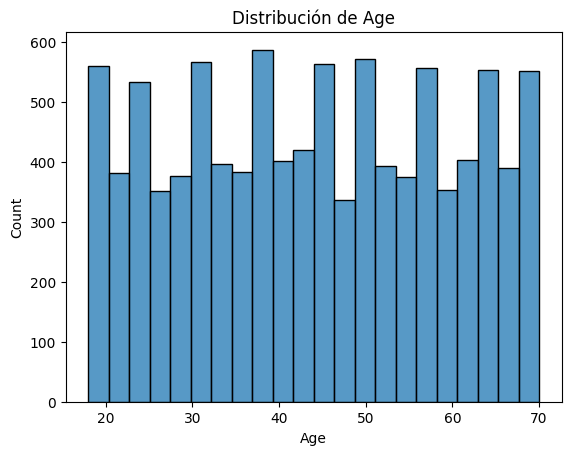

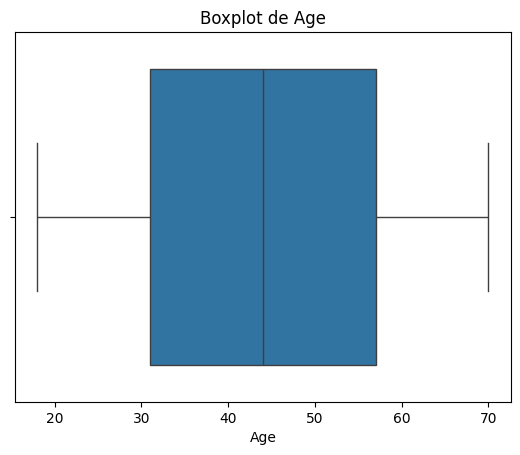

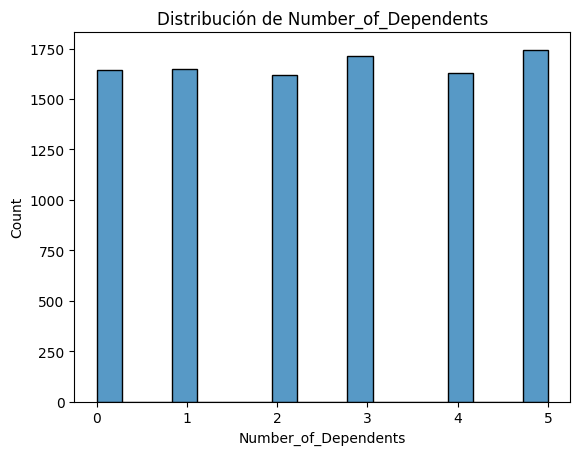

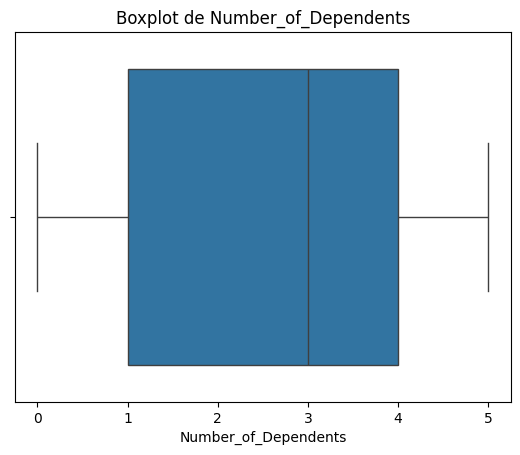

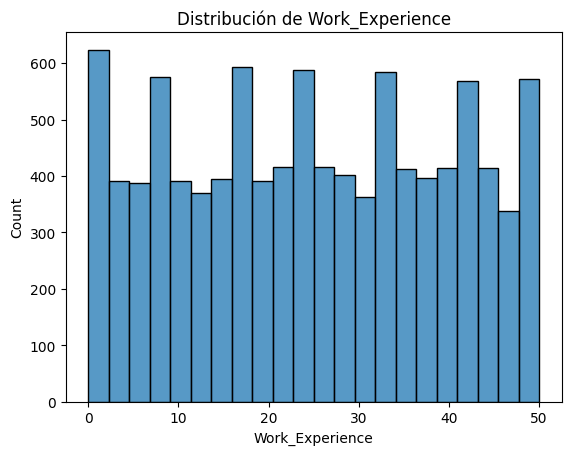

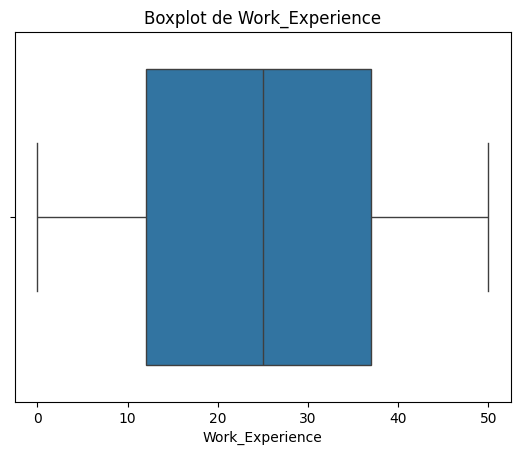

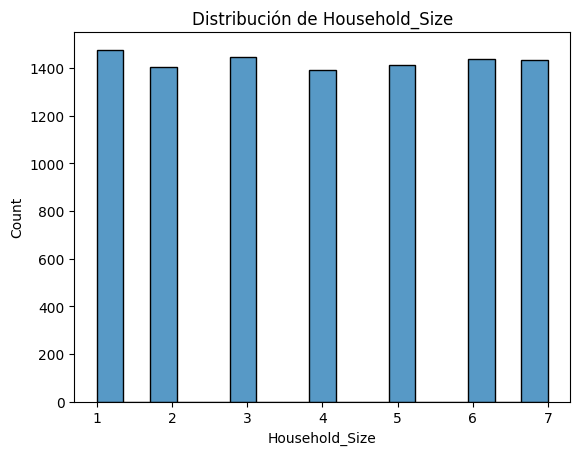

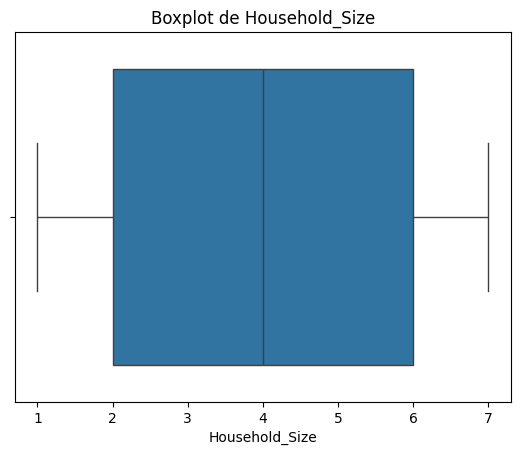

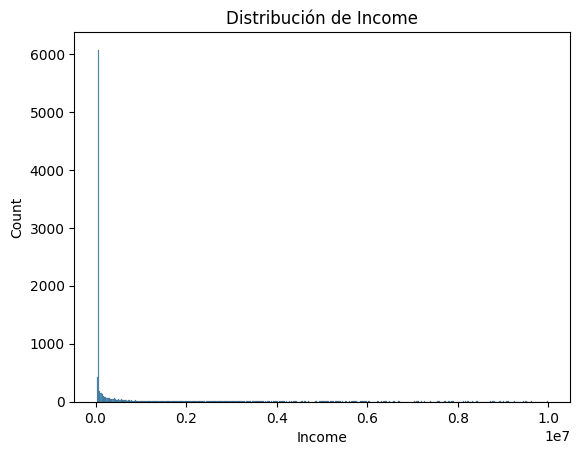

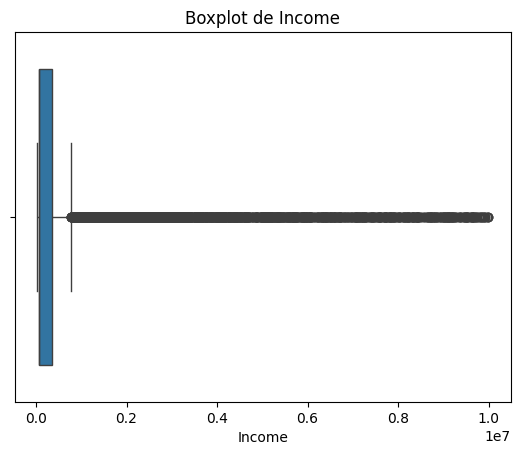

In [14]:
# Numéricas
for col in num_cols:
    sns.histplot(df[col].dropna())
    plt.title(f'Distribución de {col}')
    plt.show()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Dado que las variables categóricas no presentan valores atípicos en sentido estadístico, el análisis se centra en la distribución de frecuencias, donde se identifican subcategorías con mayor predominancia en cada variable.

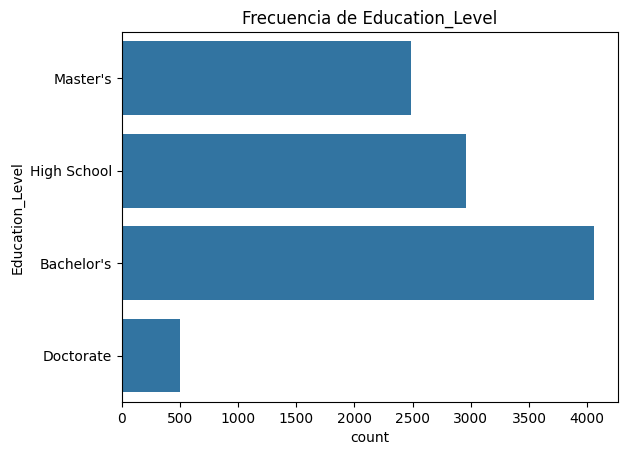

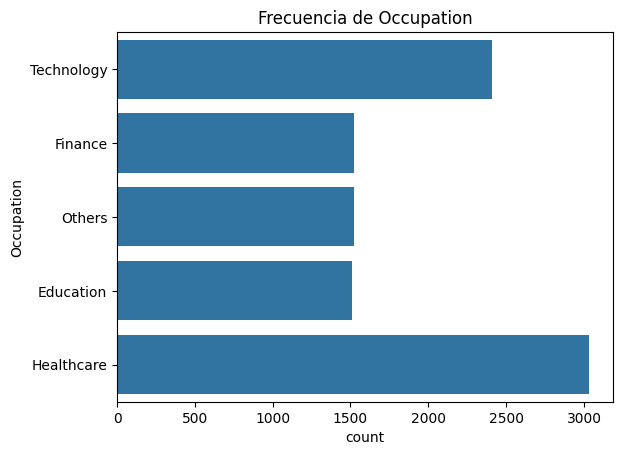

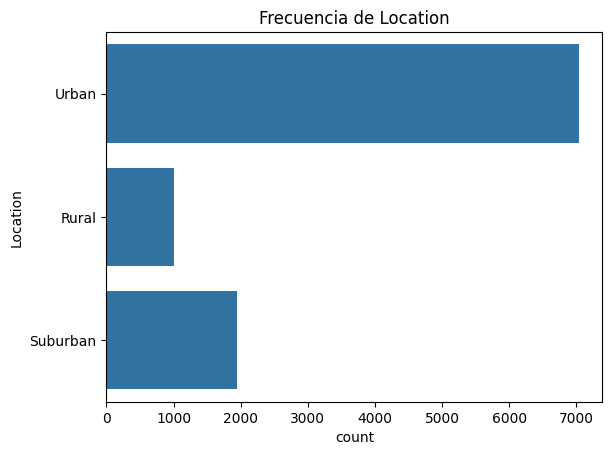

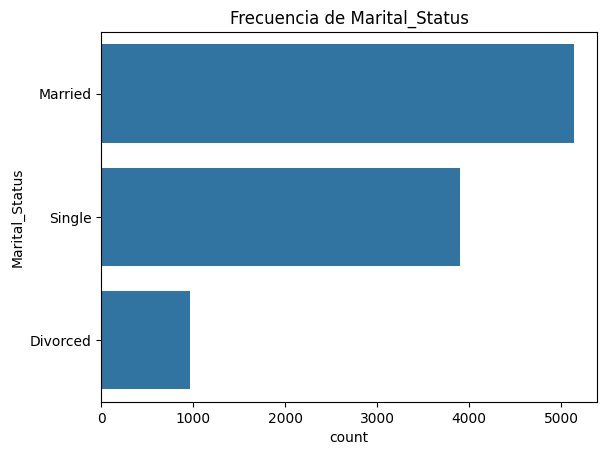

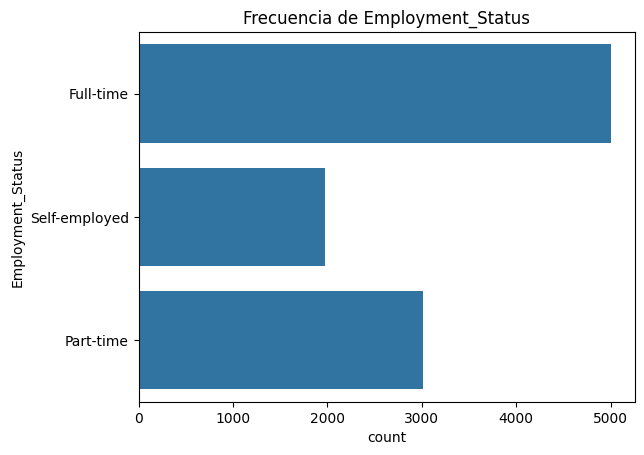

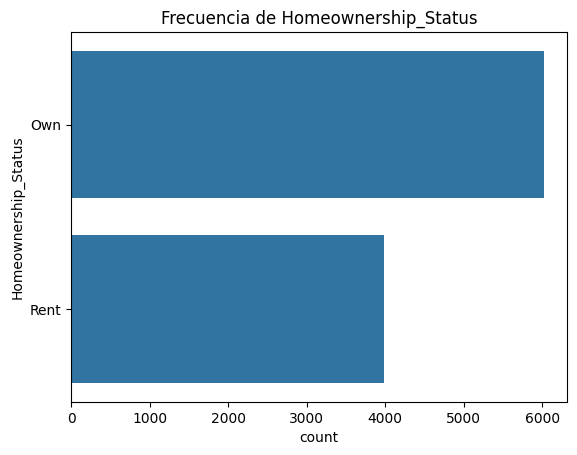

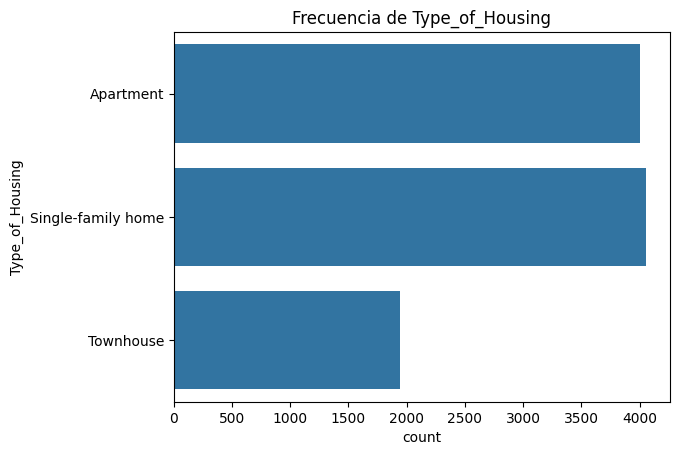

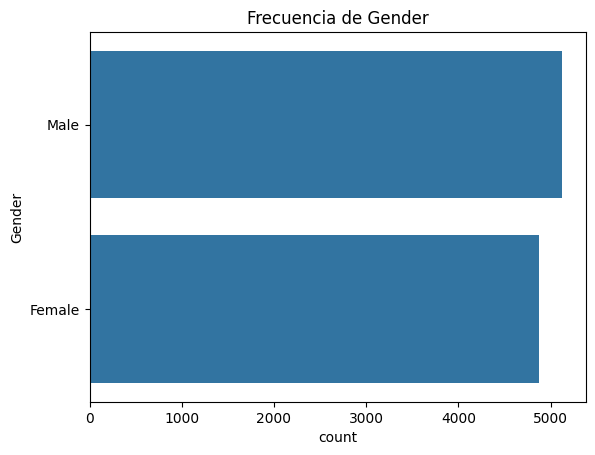

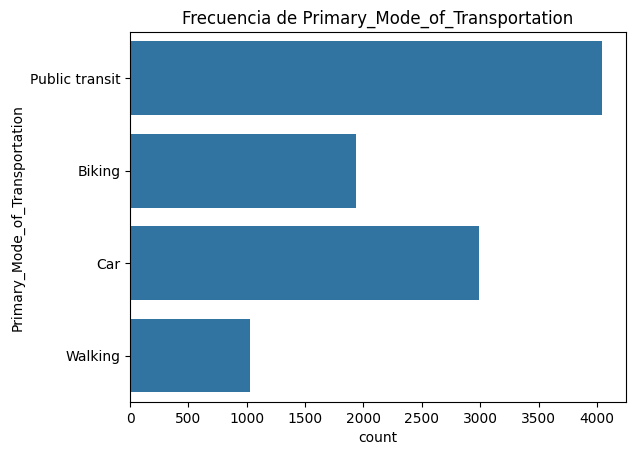

In [15]:
# Categóricas
for col in cat_cols:
    sns.countplot(y=df[col])
    plt.title(f'Frecuencia de {col}')
    plt.show()

## **5. EDA bivariado vs target**

# **Numéricas vs Target**

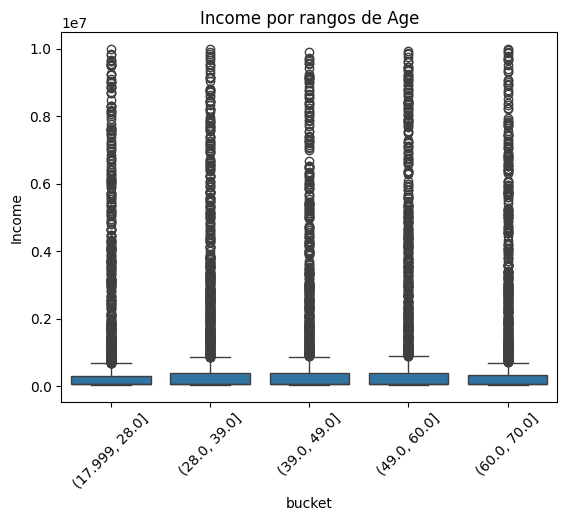

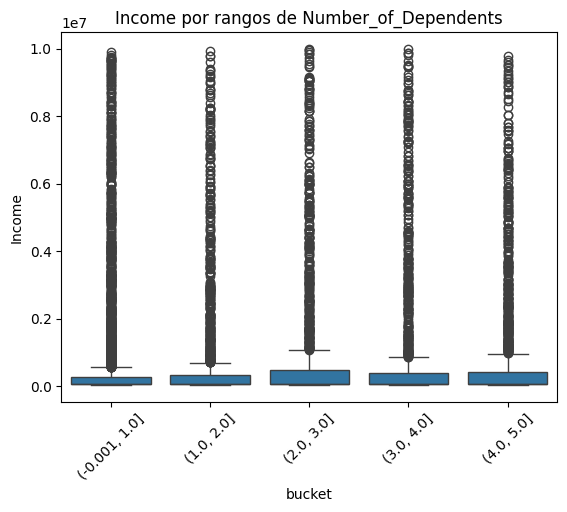

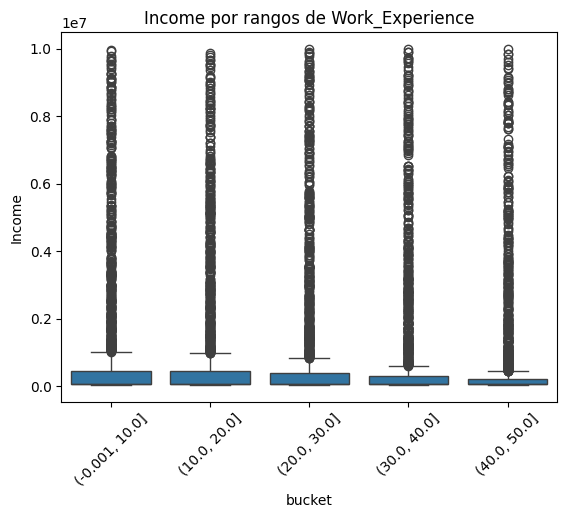

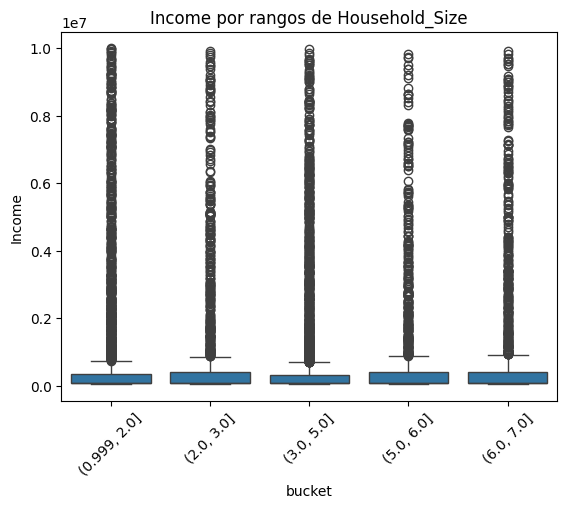

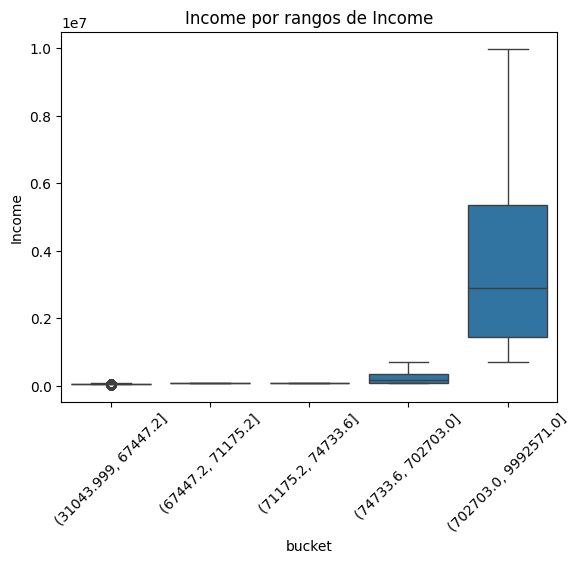

In [16]:
#estos son los resultados preliminares sin modificar el target (no es parte de este procedimiento)
target = 'Income'

# Boxplot por buckets (numéricas vs target)
for col in num_cols:
    df['bucket'] = pd.qcut(df[col], q=5, duplicates='drop')
    sns.boxplot(x='bucket', y=target, data=df)
    plt.title(f'{target} por rangos de {col}')
    plt.xticks(rotation=45)
    plt.show()
    df.drop(columns='bucket', inplace=True)


/tmp/ipython-input-1395246531.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean', 'median', 'size'])


>>> Age
                         mean   median  size
bucket                                      
(17.999, 28.0]  769554.769039  72900.0  2009
(28.0, 39.0]    853465.577611  72897.0  2126
(39.0, 49.0]    775718.526563  73028.0  1920
(49.0, 60.0]    864689.072301  73216.0  2047
(60.0, 70.0]    815848.375132  72748.0  1898


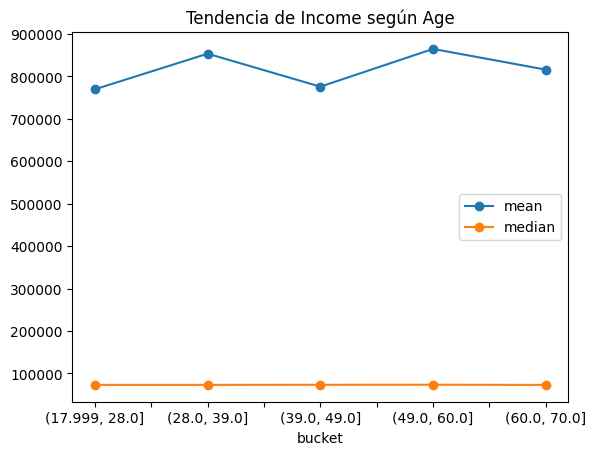

/tmp/ipython-input-1395246531.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean', 'median', 'size'])


>>> Number_of_Dependents
                        mean   median  size
bucket                                     
(-0.001, 1.0]  786150.513817  72664.0  3293
(1.0, 2.0]     783512.423196  72882.0  1621
(2.0, 3.0]     884785.126168  73070.0  1712
(3.0, 4.0]     858913.781461  73228.0  1629
(4.0, 5.0]     799766.017765  73162.0  1745


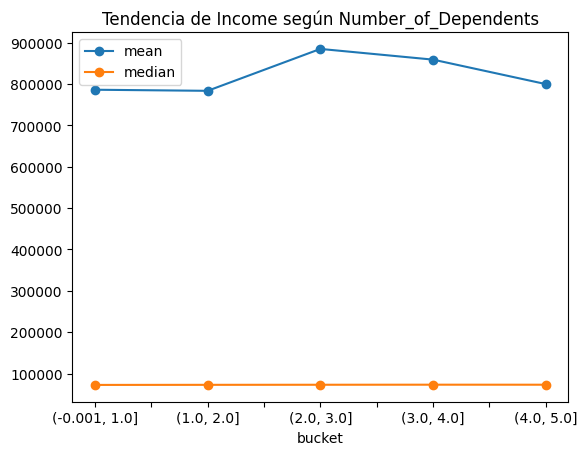

/tmp/ipython-input-1395246531.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean', 'median', 'size'])


>>> Work_Experience
                         mean   median  size
bucket                                      
(-0.001, 10.0]  857508.978889  73552.0  2179
(10.0, 20.0]    885261.469346  73562.0  1941
(20.0, 30.0]    847045.241758  73023.0  2002
(30.0, 40.0]    771140.052843  72598.0  1987
(40.0, 50.0]    715778.546272  72156.0  1891


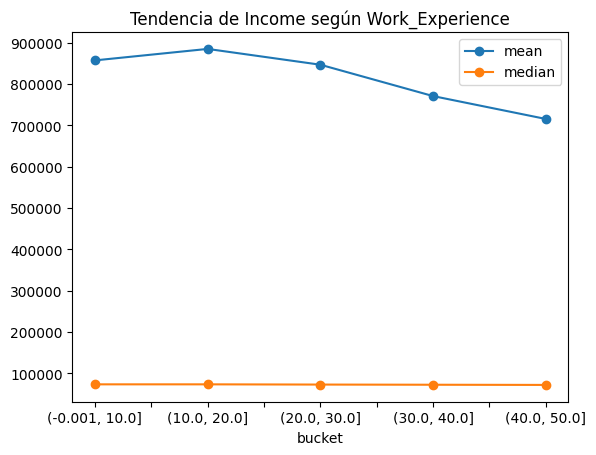

/tmp/ipython-input-1395246531.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean', 'median', 'size'])


>>> Household_Size
                       mean   median  size
bucket                                    
(0.999, 2.0]  851129.349983  72892.0  2883
(2.0, 3.0]    834774.685813  73230.0  1445
(3.0, 5.0]    798475.439686  73002.0  2802
(5.0, 6.0]    731660.973556  72736.0  1437
(6.0, 7.0]    851082.574320  73038.0  1433


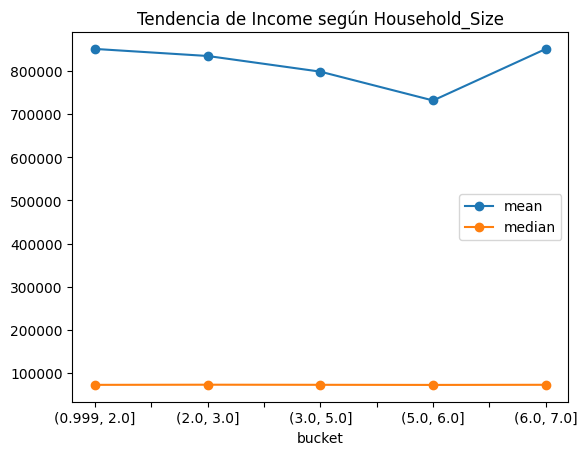

/tmp/ipython-input-1395246531.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean', 'median', 'size'])


>>> Income
                               mean     median  size
bucket                                              
(31043.999, 67447.2]   6.110452e+04    65766.0  2000
(67447.2, 71175.2]     6.932348e+04    69295.0  2000
(71175.2, 74733.6]     7.295442e+04    72943.0  2000
(74733.6, 702703.0]    2.382324e+05   169656.0  2000
(702703.0, 9992571.0]  3.642576e+06  2891016.0  2000


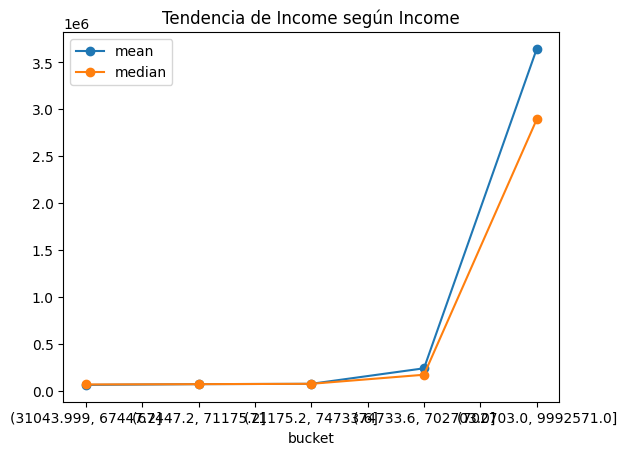

In [17]:
# Target medio y mediano por buckets - ayuda con la interpretación de estos resultados, es por umbrales, pero como osea de los cambios de nivel
for col in num_cols:
    df['bucket'] = pd.qcut(df[col], q=5, duplicates='drop')
    resumen = df.groupby('bucket')[target].agg(['mean', 'median', 'size'])
    print(f'>>> {col}')
    print(resumen)
    resumen[['mean','median']].plot(kind='line', marker='o', title=f'Tendencia de {target} según {col}')
    plt.show()
    df.drop(columns='bucket', inplace=True)


/tmp/ipython-input-2046162682.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean','median','size']).reset_index()


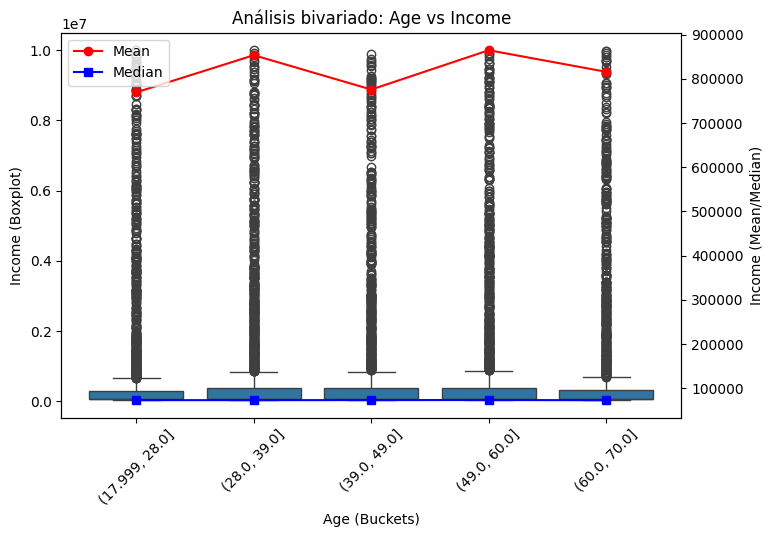

/tmp/ipython-input-2046162682.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean','median','size']).reset_index()


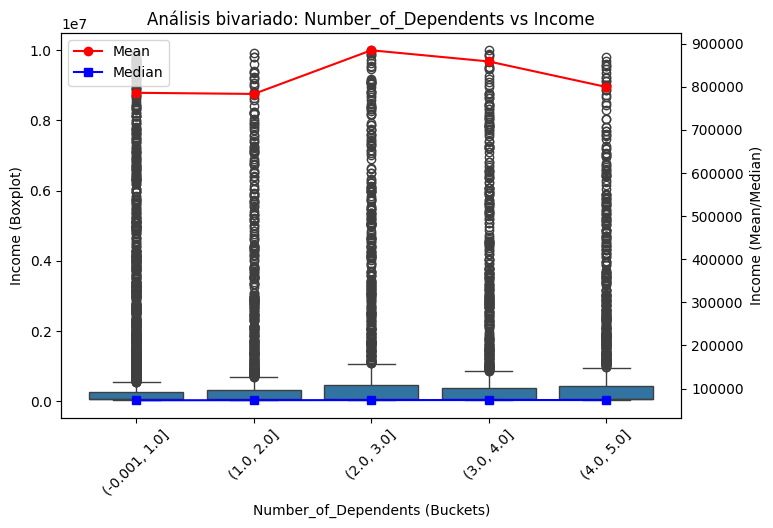

/tmp/ipython-input-2046162682.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean','median','size']).reset_index()


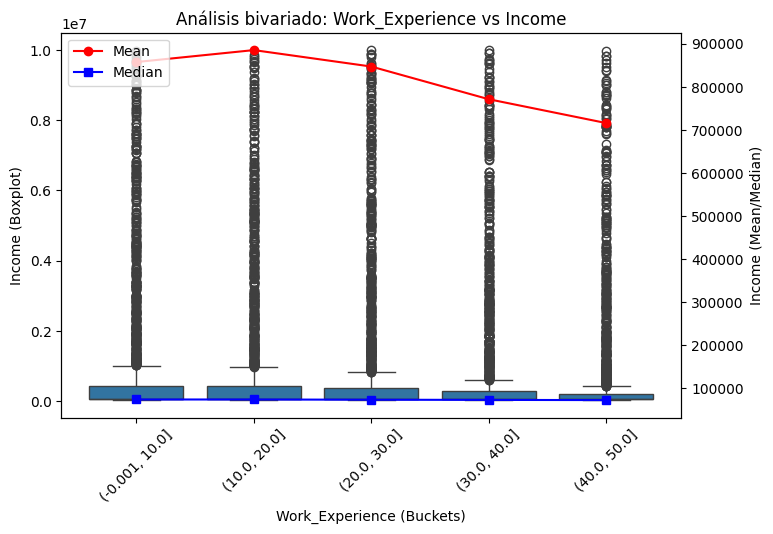

/tmp/ipython-input-2046162682.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean','median','size']).reset_index()


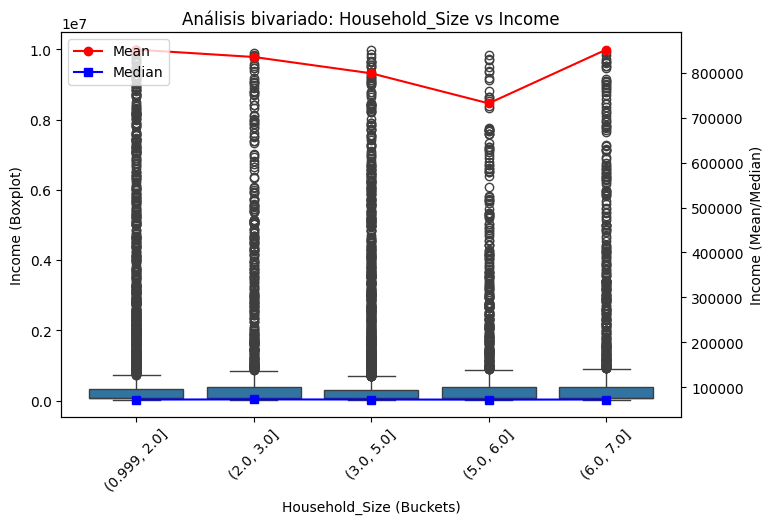

/tmp/ipython-input-2046162682.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('bucket')[target].agg(['mean','median','size']).reset_index()


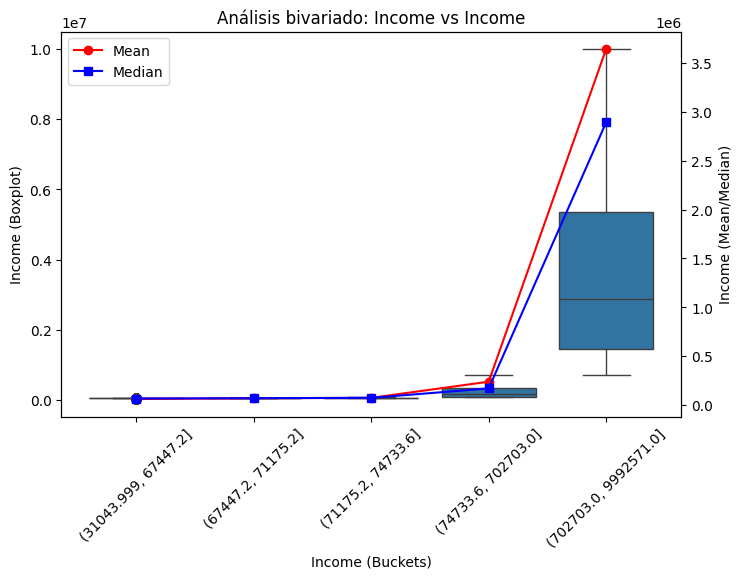

In [24]:
#empleando la función Twinx para una mejor interpretación
for col in num_cols:
    # Crear buckets (quintiles)
    df['bucket'] = pd.qcut(df[col], q=5, duplicates='drop')

    # Resumen por bucket
    resumen = df.groupby('bucket')[target].agg(['mean','median','size']).reset_index()

    # Crear figura y eje principal
    fig, ax1 = plt.subplots(figsize=(8,5))

    # Boxplot en eje izquierdo
    sns.boxplot(x='bucket', y=target, data=df, ax=ax1)
    ax1.set_ylabel(f'{target} (Boxplot)')
    ax1.set_xlabel(f'{col} (Buckets)')
    ax1.tick_params(axis='x', rotation=45)

    # Crear eje secundario
    ax2 = ax1.twinx()

    # Línea de tendencia (mean y median)
    ax2.plot(resumen['bucket'].astype(str), resumen['mean'], color='red', marker='o', label='Mean')
    ax2.plot(resumen['bucket'].astype(str), resumen['median'], color='blue', marker='s', label='Median')
    ax2.set_ylabel(f'{target} (Mean/Median)')

    # Leyenda combinada
    ax2.legend(loc='upper left')

    plt.title(f'Análisis bivariado: {col} vs {target}')
    plt.show()

    # Eliminar columna temporal
    df.drop(columns='bucket', inplace=True)


Tendencia de Income según Age:
bucket
(17.999, 28.0]    769554.769039
(28.0, 39.0]      853465.577611
(39.0, 49.0]      775718.526563
(49.0, 60.0]      864689.072301
(60.0, 70.0]      815848.375132
Name: Income, dtype: float64


/tmp/ipython-input-4193621585.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia = df.groupby('bucket')[target].mean()


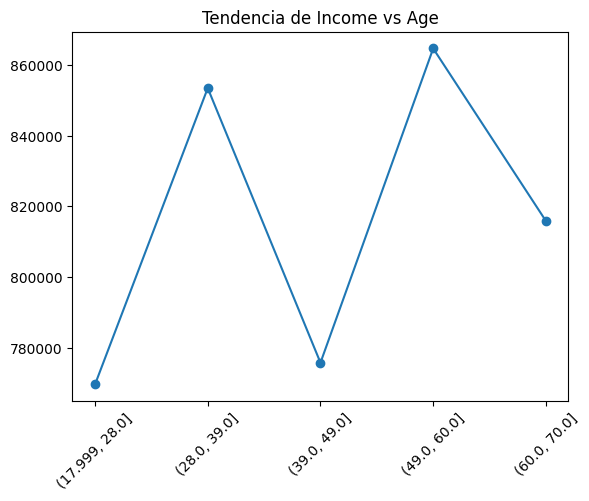

Tendencia de Income según Number_of_Dependents:
bucket
(-0.001, 1.0]    786150.513817
(1.0, 2.0]       783512.423196
(2.0, 3.0]       884785.126168
(3.0, 4.0]       858913.781461
(4.0, 5.0]       799766.017765
Name: Income, dtype: float64


/tmp/ipython-input-4193621585.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia = df.groupby('bucket')[target].mean()


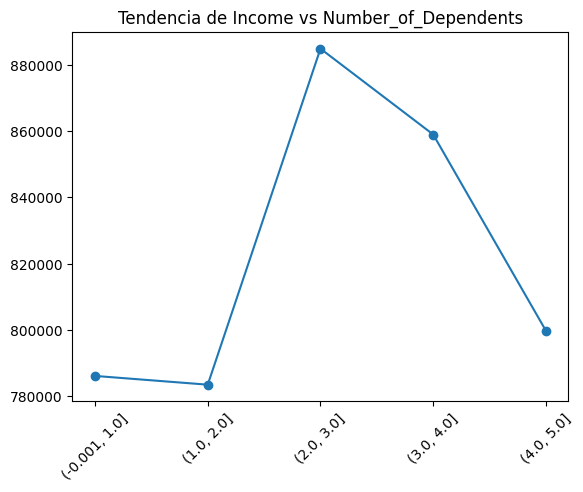

Tendencia de Income según Work_Experience:
bucket
(-0.001, 10.0]    857508.978889
(10.0, 20.0]      885261.469346
(20.0, 30.0]      847045.241758
(30.0, 40.0]      771140.052843
(40.0, 50.0]      715778.546272
Name: Income, dtype: float64


/tmp/ipython-input-4193621585.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia = df.groupby('bucket')[target].mean()


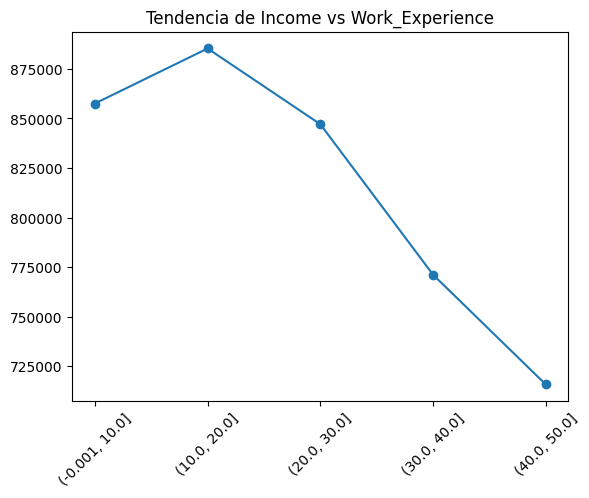

/tmp/ipython-input-4193621585.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia = df.groupby('bucket')[target].mean()


Tendencia de Income según Household_Size:
bucket
(0.999, 2.0]    851129.349983
(2.0, 3.0]      834774.685813
(3.0, 5.0]      798475.439686
(5.0, 6.0]      731660.973556
(6.0, 7.0]      851082.574320
Name: Income, dtype: float64


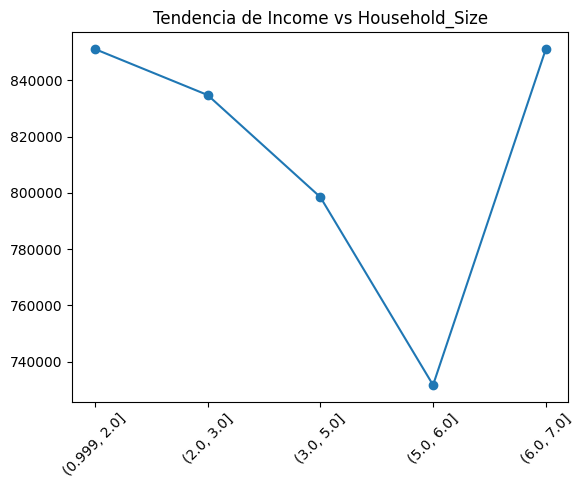

/tmp/ipython-input-4193621585.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia = df.groupby('bucket')[target].mean()


Tendencia de Income según Income:
bucket
(31043.999, 67447.2]     6.110452e+04
(67447.2, 71175.2]       6.932348e+04
(71175.2, 74733.6]       7.295442e+04
(74733.6, 702703.0]      2.382324e+05
(702703.0, 9992571.0]    3.642576e+06
Name: Income, dtype: float64


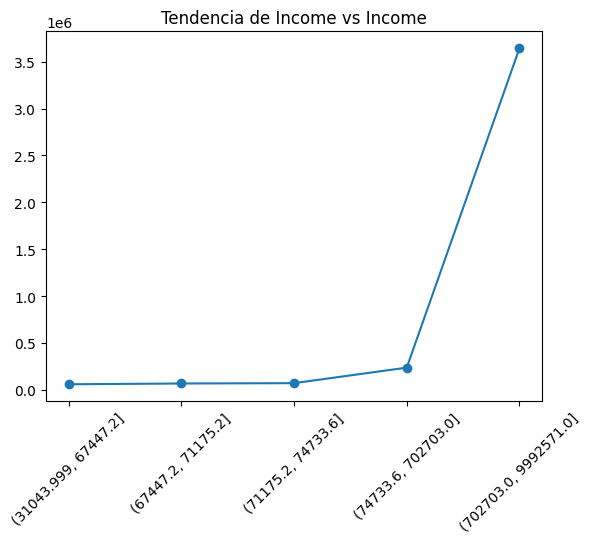

In [19]:
# Tendencia: evaluar monotonía o quiebres
for col in num_cols:
    df['bucket'] = pd.qcut(df[col], q=5, duplicates='drop')
    tendencia = df.groupby('bucket')[target].mean()
    print(f'Tendencia de {target} según {col}:')
    print(tendencia)
    plt.plot(tendencia.index.astype(str), tendencia.values, marker='o')
    plt.title(f'Tendencia de {target} vs {col}')
    plt.xticks(rotation=45)
    plt.show()
    df.drop(columns='bucket', inplace=True)


# **Categoria vs target**


>>> Education_Level
                          mean   median  size
Education_Level                              
Bachelor's       812335.910793  72888.0  4058
Doctorate        628710.652695  71346.0   501
High School      868667.401487  73452.0  2959
Master's         800383.425866  72747.0  2482


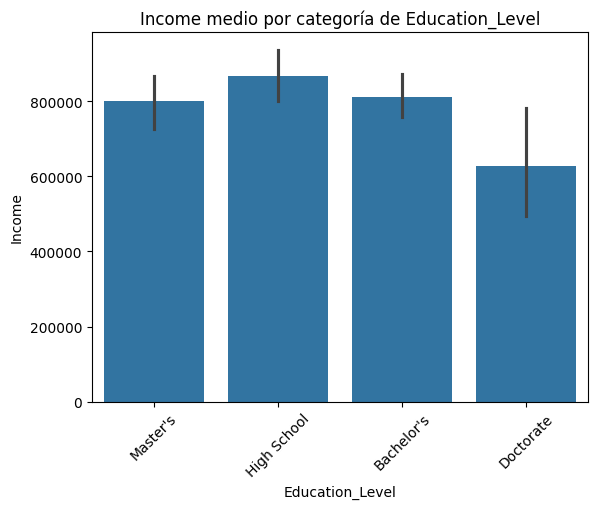

>>> Occupation
                     mean   median  size
Occupation                              
Education   920816.752646  73317.0  1512
Finance     706152.669508  72228.0  1525
Healthcare  799238.763097  73146.0  3035
Others      828970.392505  73428.0  1521
Technology  836173.786041  72650.0  2407


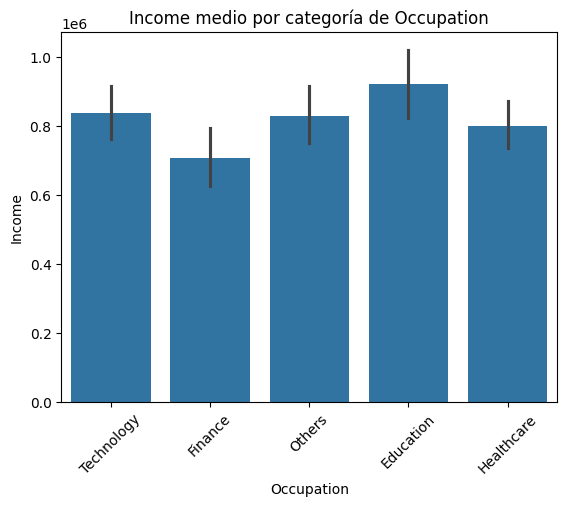

>>> Location
                  mean   median  size
Location                             
Rural     1.050473e+06  74815.0  1012
Suburban  9.213989e+05  73198.0  1951
Urban     7.542496e+05  72664.0  7037


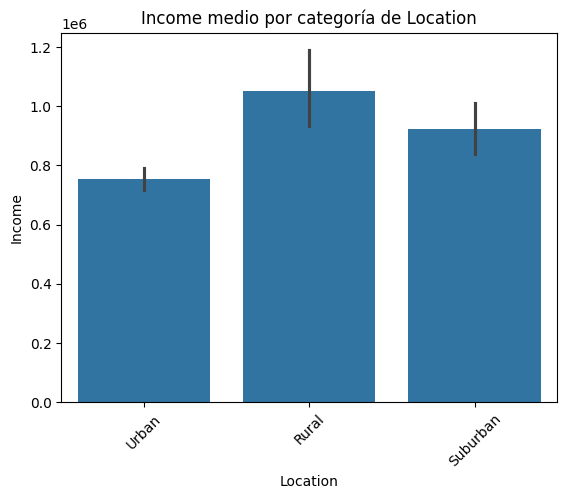

>>> Marital_Status
                         mean   median  size
Marital_Status                              
Divorced        780830.581950  73112.0   964
Married         839259.728193  72919.0  5136
Single          796211.031282  72936.0  3900


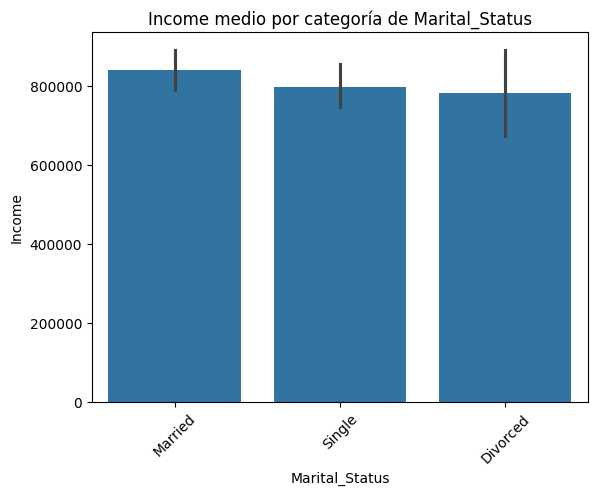

>>> Employment_Status
                            mean   median  size
Employment_Status                              
Full-time          780894.959432  72812.0  5004
Part-time          905303.193966  73512.0  3016
Self-employed      772923.665152  72616.0  1980


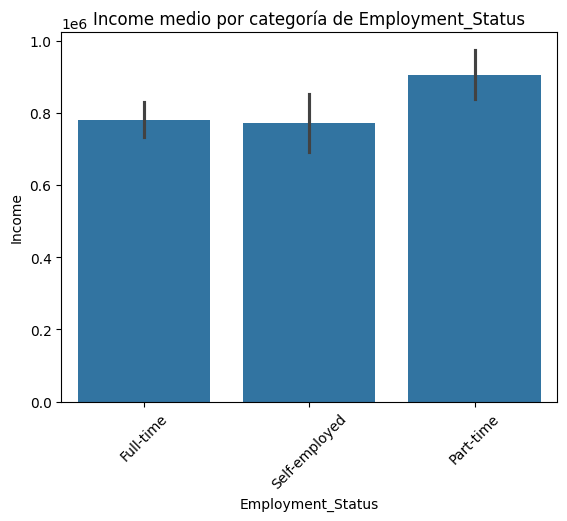

>>> Homeownership_Status
                               mean   median  size
Homeownership_Status                              
Own                   724168.400798  71921.0  6018
Rent                  956890.063034  75328.0  3982


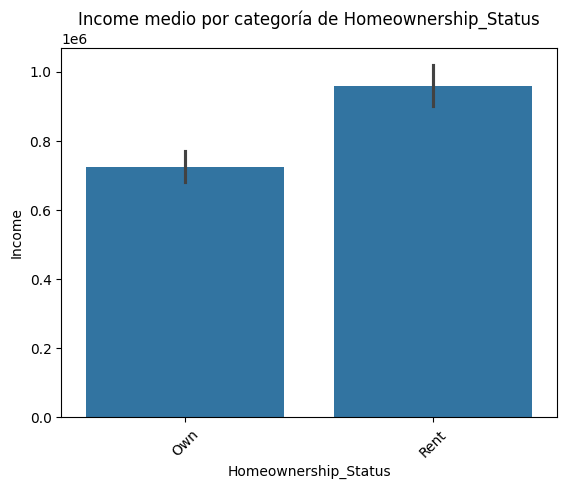

>>> Type_of_Housing
                             mean   median  size
Type_of_Housing                                 
Apartment           873187.825294  73556.0  4001
Single-family home  793627.046856  72658.0  4055
Townhouse           749279.579733  72575.0  1944


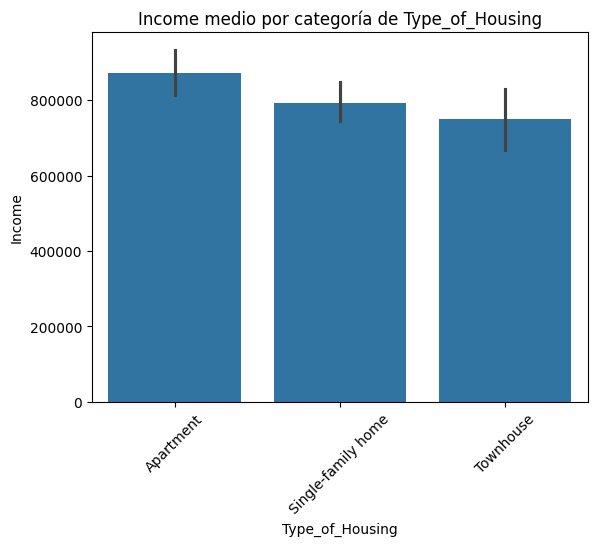

>>> Gender
                 mean   median  size
Gender                              
Female  820978.331351  72800.0  4877
Male    812896.807535  73100.0  5123


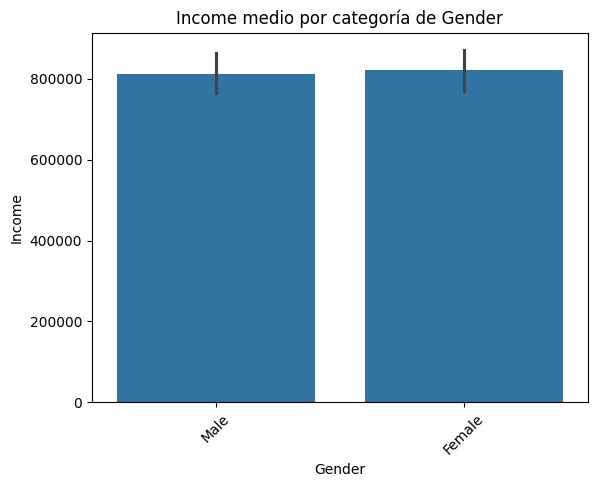

>>> Primary_Mode_of_Transportation
                                         mean   median  size
Primary_Mode_of_Transportation                              
Biking                          848860.240722  73242.0  1940
Car                             783155.797388  72937.0  2986
Public transit                  823184.629849  72834.0  4047
Walking                         829271.073028  72956.0  1027


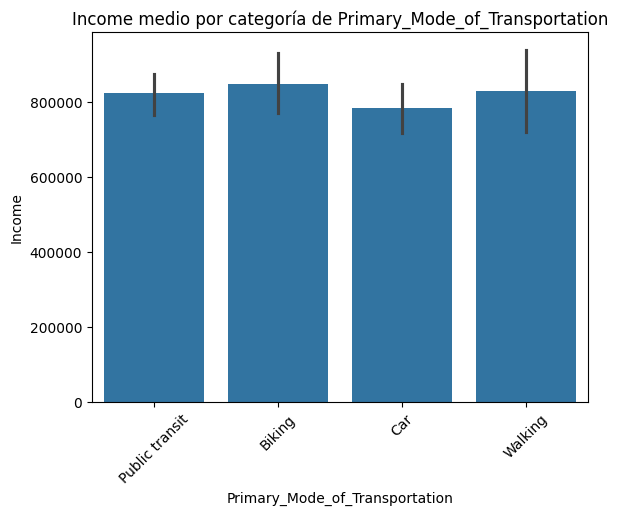

In [20]:
# Target medio y mediano por categoría
for col in cat_cols:
    resumen = df.groupby(col)[target].agg(['mean','median','size'])
    print(f'>>> {col}')
    print(resumen)
    sns.barplot(x=col, y=target, data=df, estimator=np.mean)
    plt.title(f'{target} medio por categoría de {col}')
    plt.xticks(rotation=45)
    plt.show()


>>> Education_Level
Education_Level
Bachelor's     4058
Doctorate       501
High School    2959
Master's       2482
dtype: int64


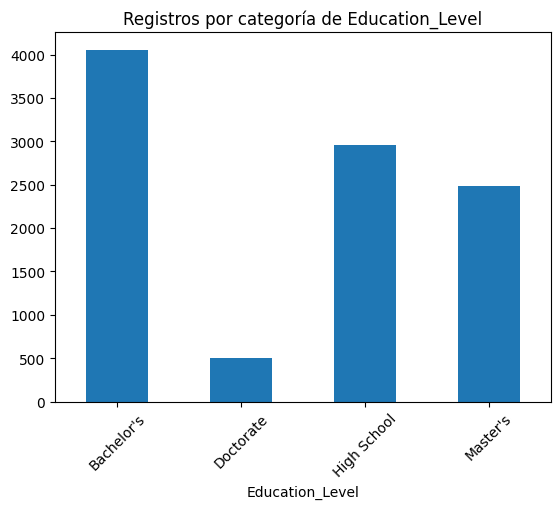

>>> Occupation
Occupation
Education     1512
Finance       1525
Healthcare    3035
Others        1521
Technology    2407
dtype: int64


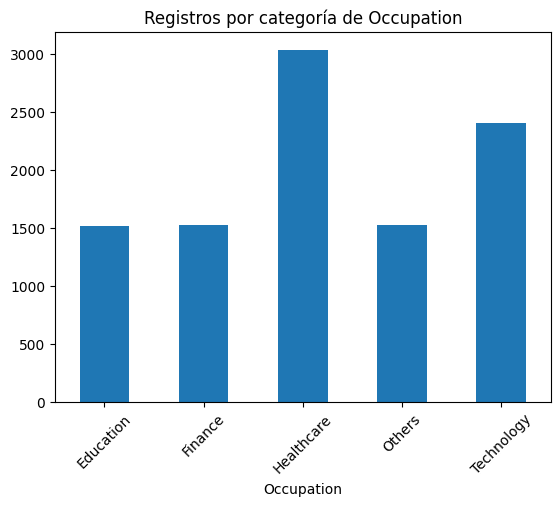

>>> Location
Location
Rural       1012
Suburban    1951
Urban       7037
dtype: int64


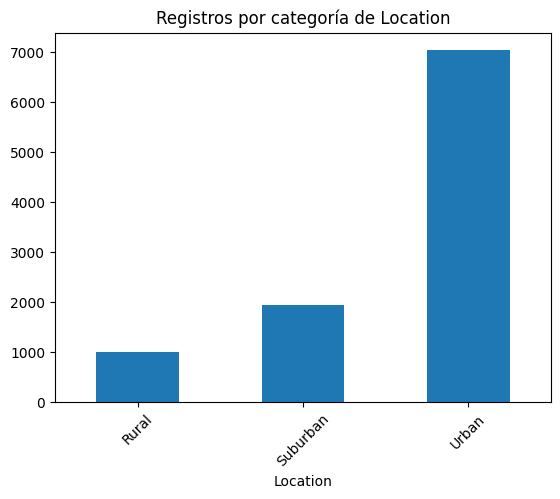

>>> Marital_Status
Marital_Status
Divorced     964
Married     5136
Single      3900
dtype: int64


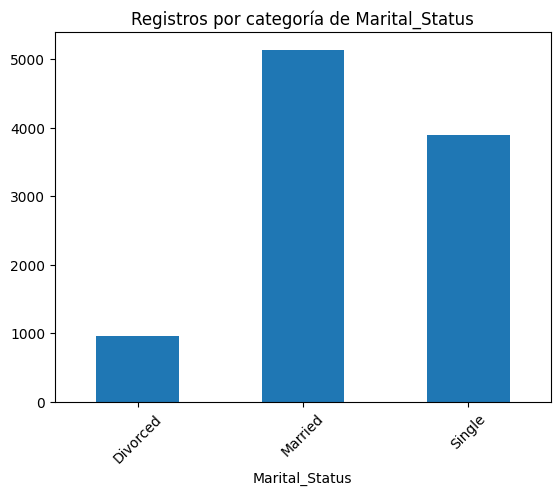

>>> Employment_Status
Employment_Status
Full-time        5004
Part-time        3016
Self-employed    1980
dtype: int64


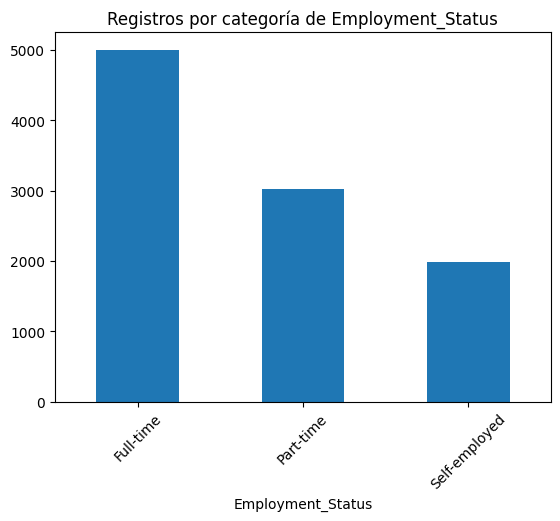

>>> Homeownership_Status
Homeownership_Status
Own     6018
Rent    3982
dtype: int64


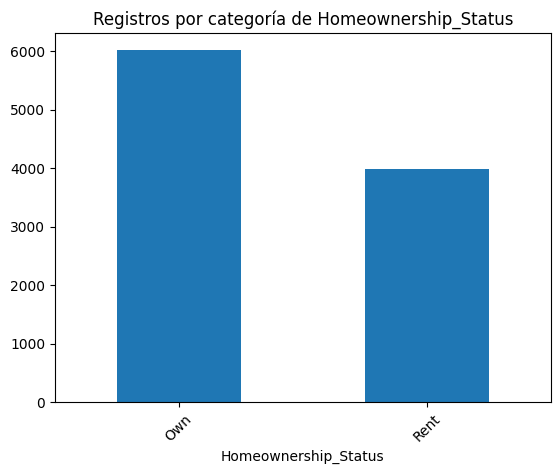

>>> Type_of_Housing
Type_of_Housing
Apartment             4001
Single-family home    4055
Townhouse             1944
dtype: int64


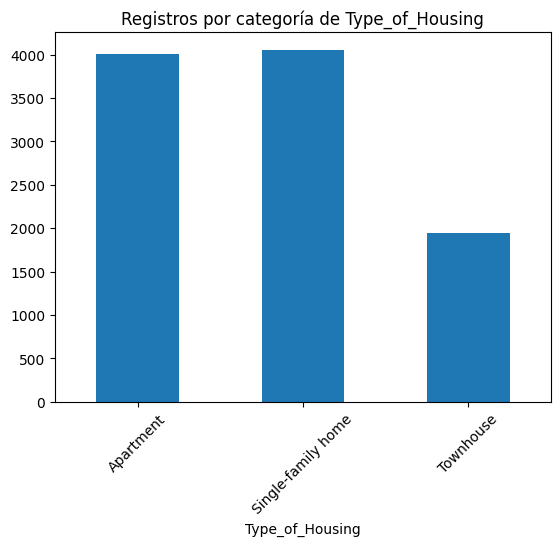

>>> Gender
Gender
Female    4877
Male      5123
dtype: int64


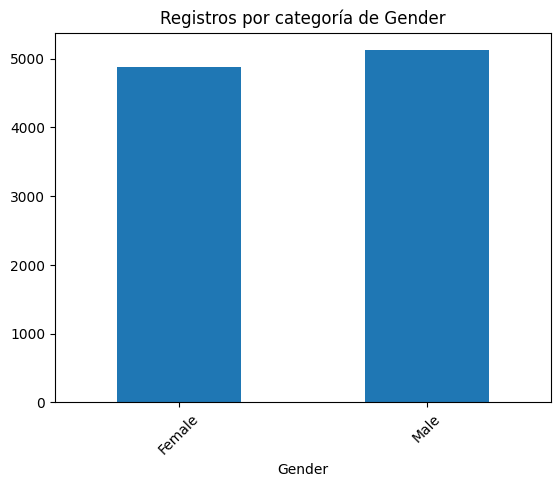

>>> Primary_Mode_of_Transportation
Primary_Mode_of_Transportation
Biking            1940
Car               2986
Public transit    4047
Walking           1027
dtype: int64


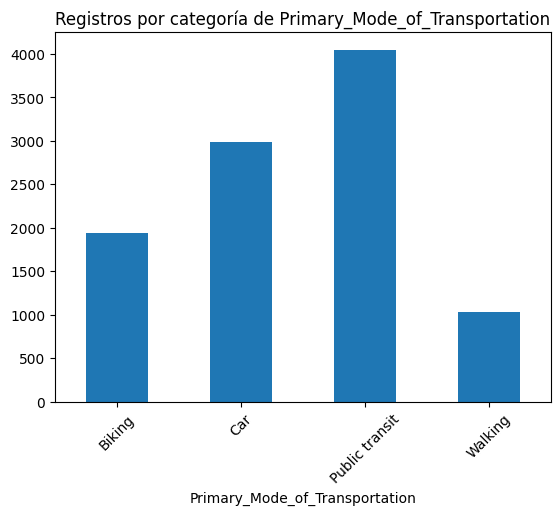

In [21]:
# Conteo de registros por categoría
for col in cat_cols:
    conteo = df.groupby(col).size()
    print(f'>>> {col}')
    print(conteo)
    conteo.plot(kind='bar', title=f'Registros por categoría de {col}')
    plt.xticks(rotation=45)
    plt.show()


Dispersión de Income en Education_Level:
Education_Level
Bachelor's     1.819901e+06
Doctorate      1.628288e+06
High School    1.868058e+06
Master's       1.801176e+06
Name: Income, dtype: float64


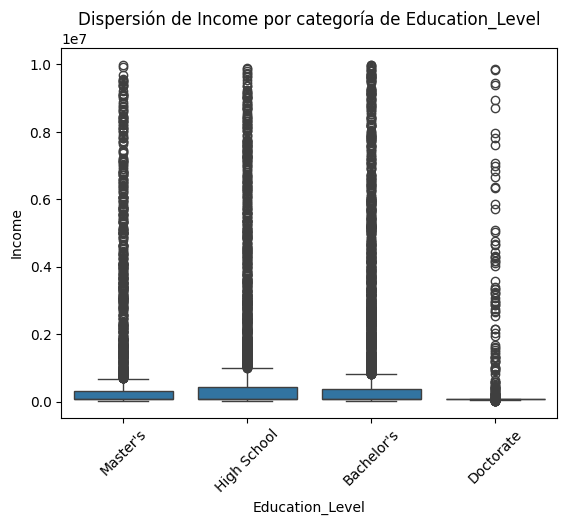

Dispersión de Income en Occupation:
Occupation
Education     1.948415e+06
Finance       1.675412e+06
Healthcare    1.796588e+06
Others        1.788429e+06
Technology    1.874548e+06
Name: Income, dtype: float64


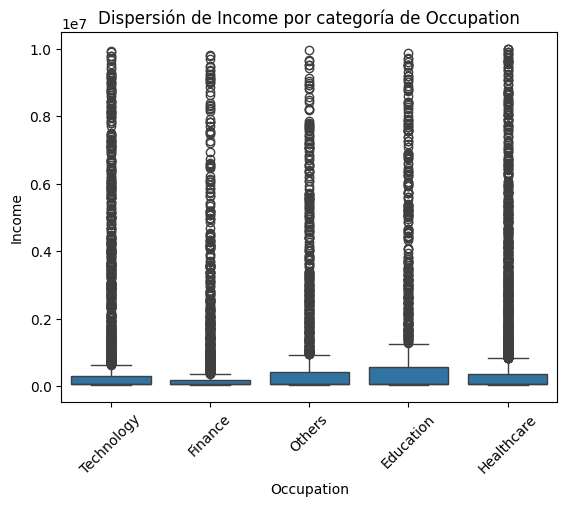

Dispersión de Income en Location:
Location
Rural       2.032914e+06
Suburban    1.959853e+06
Urban       1.743502e+06
Name: Income, dtype: float64


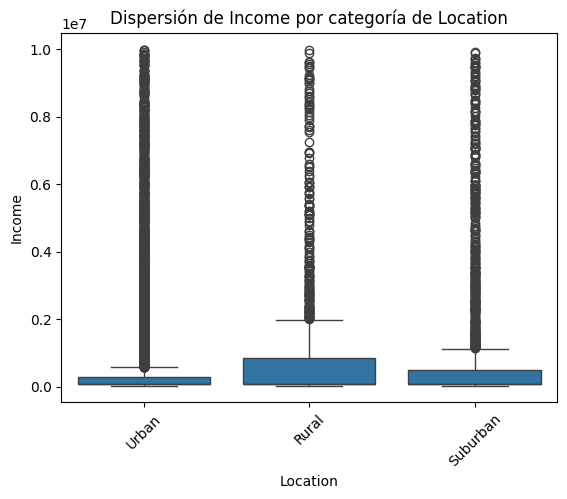

Dispersión de Income en Marital_Status:
Marital_Status
Divorced    1.718133e+06
Married     1.850875e+06
Single      1.806271e+06
Name: Income, dtype: float64


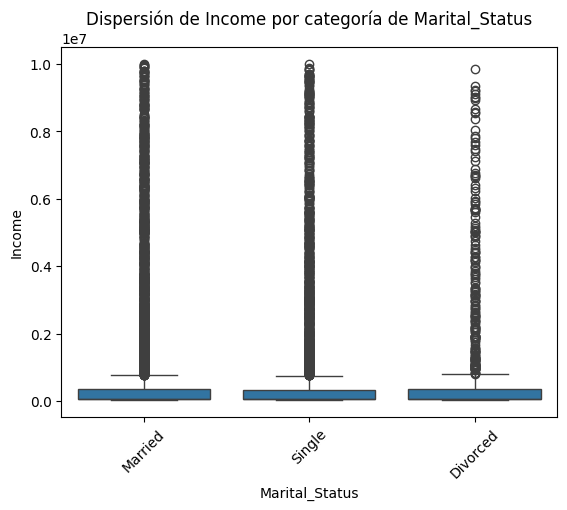

Dispersión de Income en Employment_Status:
Employment_Status
Full-time        1.761391e+06
Part-time        1.928840e+06
Self-employed    1.796577e+06
Name: Income, dtype: float64


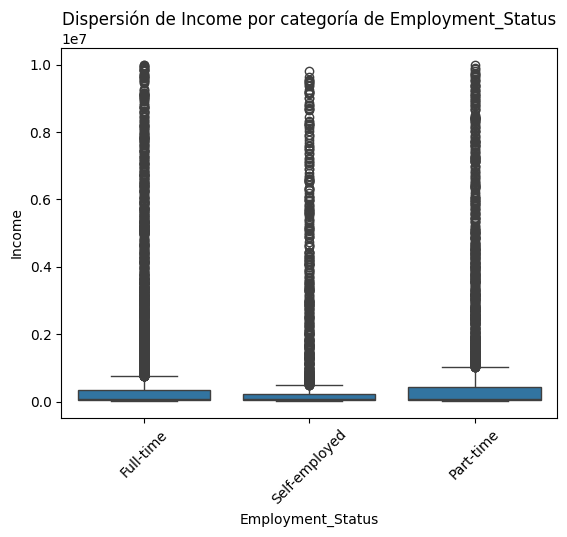

Dispersión de Income en Homeownership_Status:
Homeownership_Status
Own     1.771107e+06
Rent    1.885728e+06
Name: Income, dtype: float64


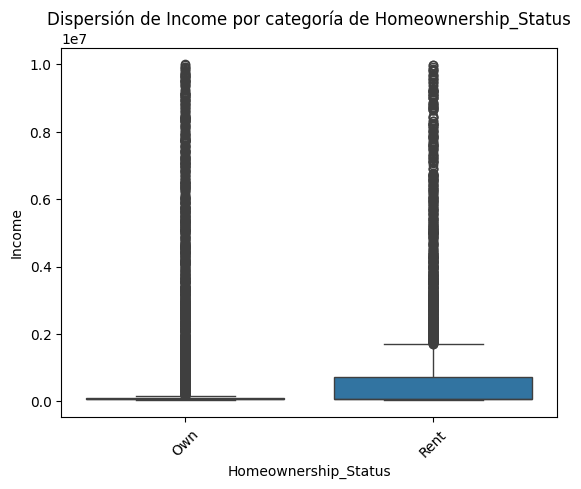

Dispersión de Income en Type_of_Housing:
Type_of_Housing
Apartment             1.876207e+06
Single-family home    1.784321e+06
Townhouse             1.778936e+06
Name: Income, dtype: float64


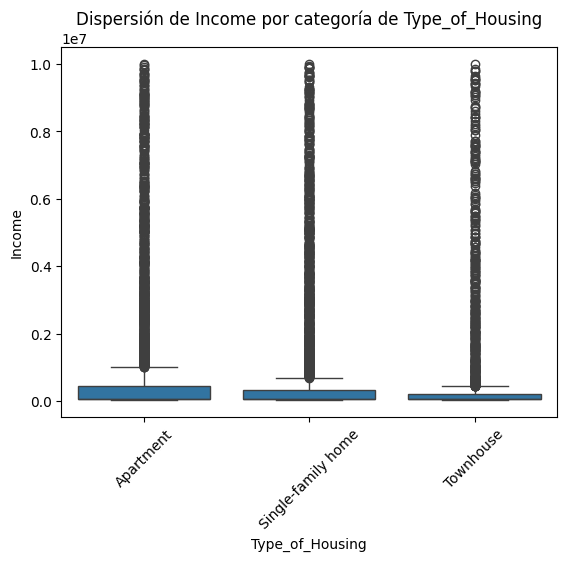

Dispersión de Income en Gender:
Gender
Female    1.827462e+06
Male      1.815171e+06
Name: Income, dtype: float64


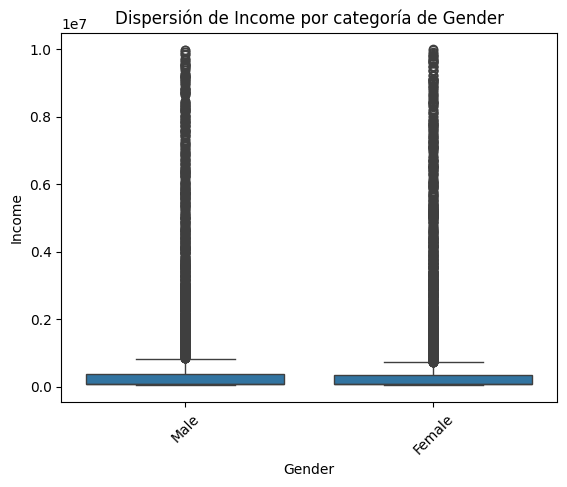

Dispersión de Income en Primary_Mode_of_Transportation:
Primary_Mode_of_Transportation
Biking            1.876695e+06
Car               1.755815e+06
Public transit    1.842409e+06
Walking           1.817467e+06
Name: Income, dtype: float64


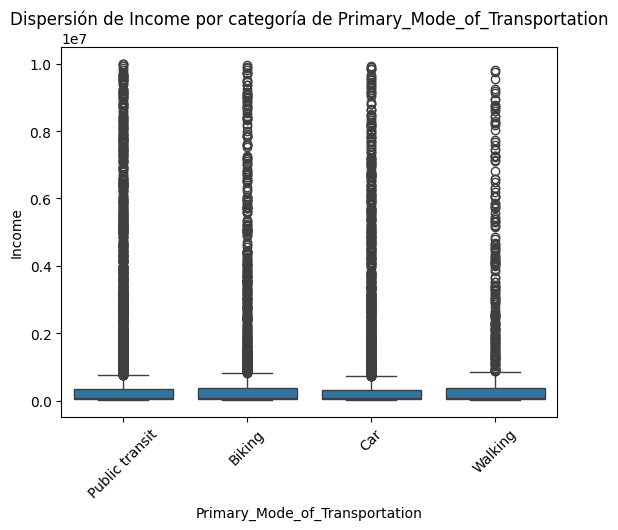

In [22]:
# Dispersión del target dentro de cada categoría - Boxplots
for col in cat_cols:
    dispersion = df.groupby(col)[target].std()
    print(f'Dispersión de {target} en {col}:')
    print(dispersion)
    sns.boxplot(x=col, y=target, data=df)
    plt.title(f'Dispersión de {target} por categoría de {col}')
    plt.xticks(rotation=45)
    plt.show()


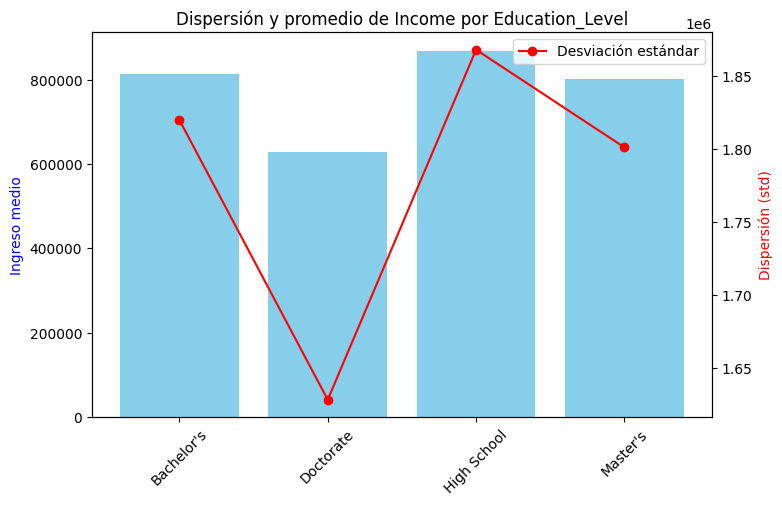

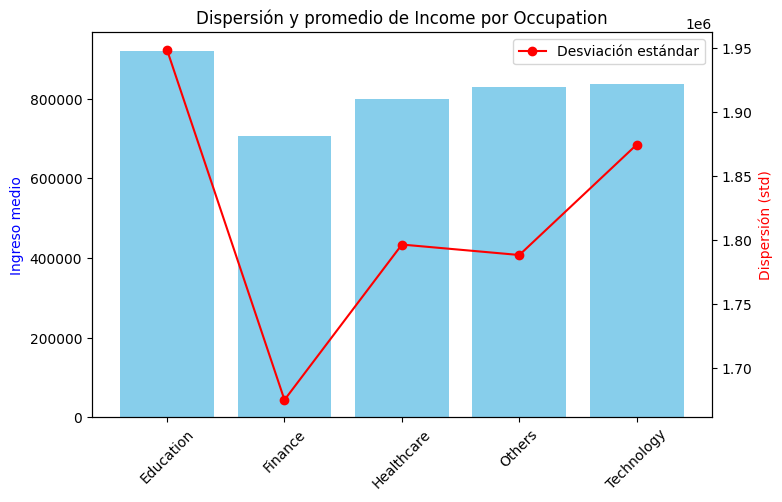

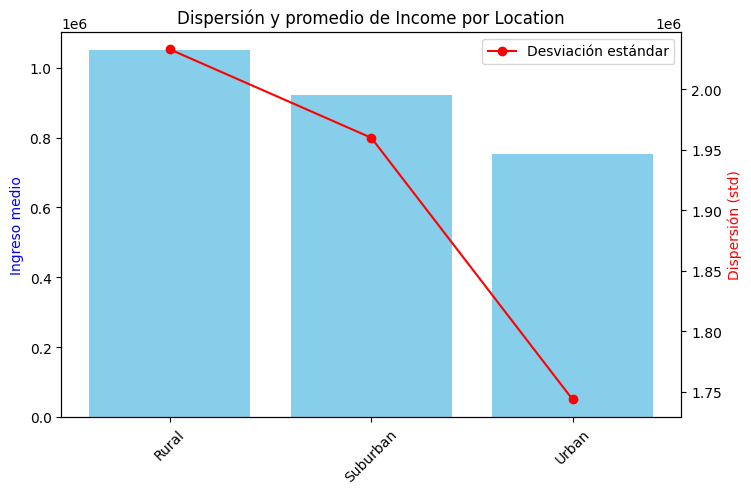

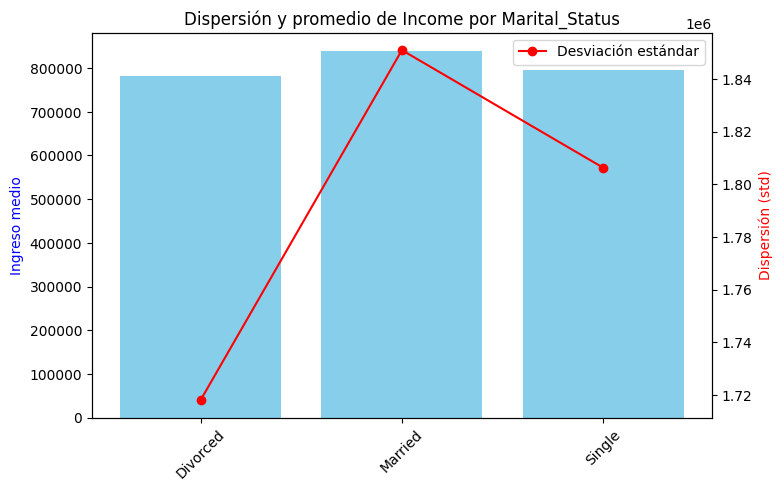

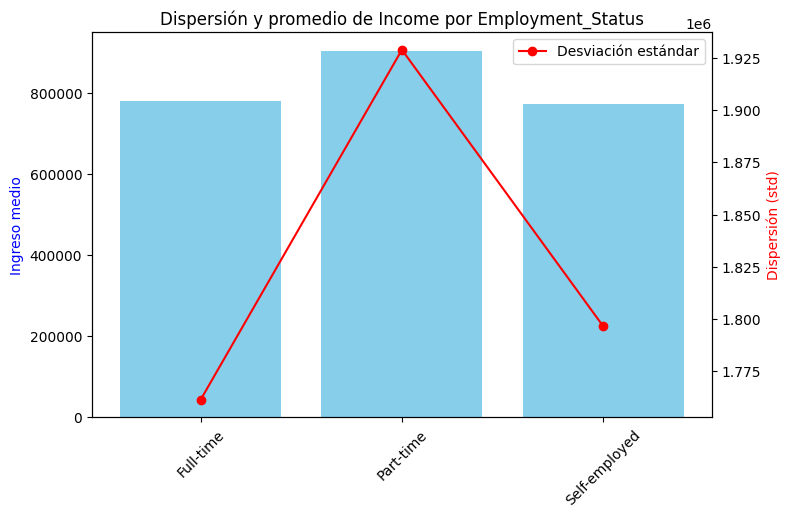

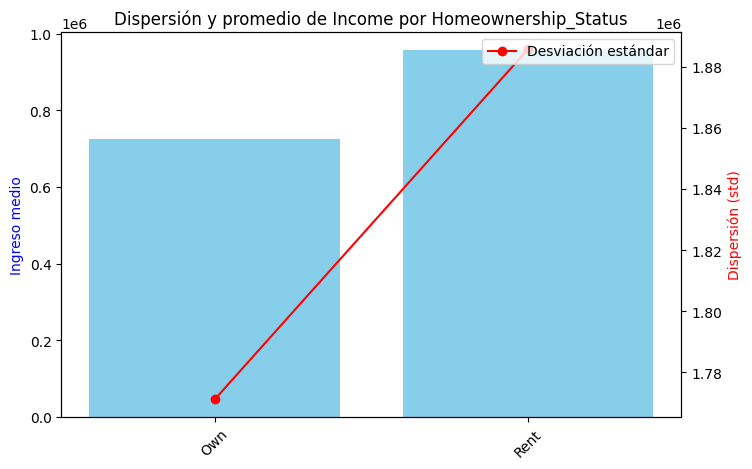

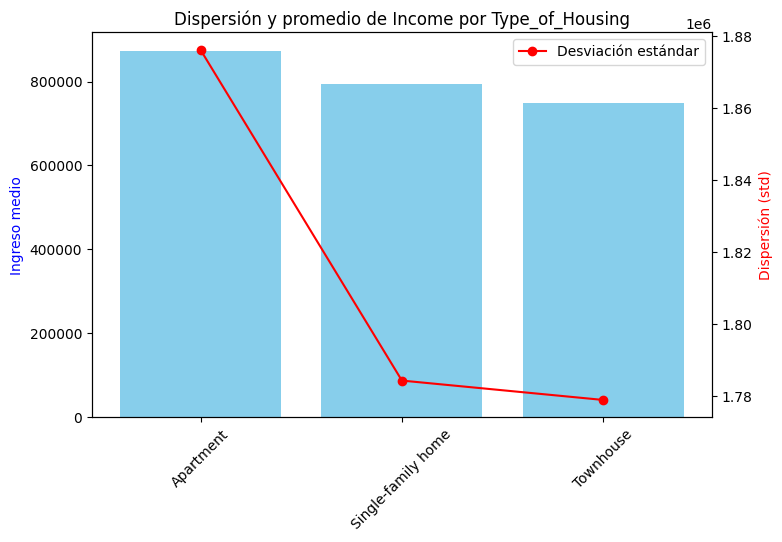

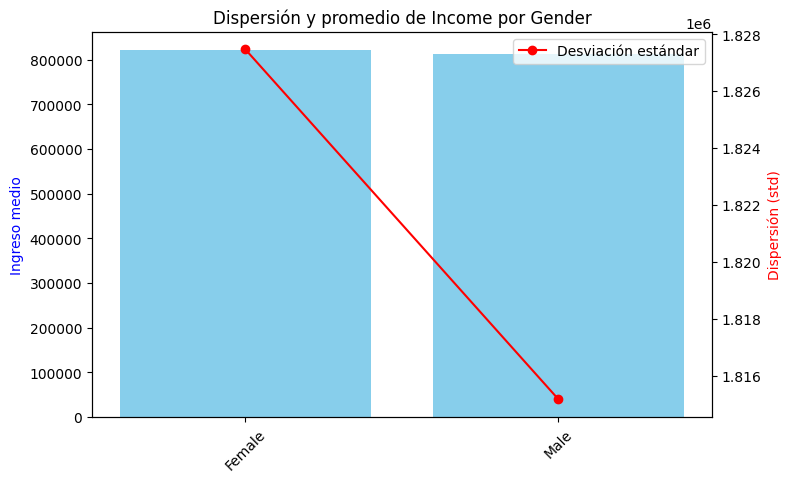

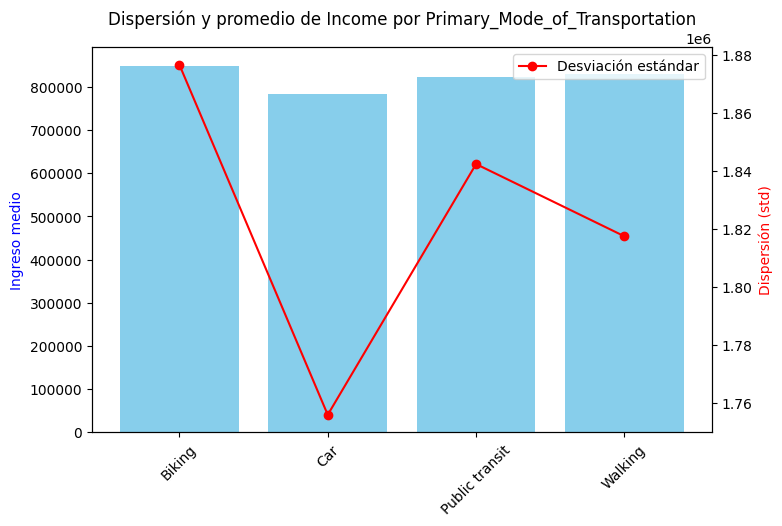

In [23]:
#Dispersión del target dentro de cada categoria - Twinx
import numpy as np

for col in cat_cols:
    resumen = df.groupby(col)[target].agg(['mean','std']).reset_index()

    fig, ax1 = plt.subplots(figsize=(8,5))

    # Barras con el ingreso medio
    ax1.bar(resumen[col], resumen['mean'], color='skyblue')
    ax1.set_ylabel('Ingreso medio', color='blue')
    ax1.tick_params(axis='x', rotation=45)

    # Eje secundario con la dispersión (std)
    ax2 = ax1.twinx()
    ax2.plot(resumen[col], resumen['std'], color='red', marker='o', label='Desviación estándar')
    ax2.set_ylabel('Dispersión (std)', color='red')

    plt.title(f'Dispersión y promedio de {target} por {col}')
    ax2.legend(loc='upper right')
    plt.show()
